In [1]:
#relevant imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#aggregating collected data
dataset_0 = pd.read_csv("./BTC/BTC_Book_0.csv", index_col = 0, parse_dates = True)
dataset_1 = pd.read_csv("./BTC/BTC_Book_1.csv", index_col = 0, parse_dates = True)
dataset_2 = pd.read_csv("./BTC/BTC_Book_2.csv", index_col = 0, parse_dates = True)

full_dataset = dataset_0.append(dataset_1).append(dataset_2)

full_dataset

,Sequence,Bid_1_Price,Bid_1_Size,Bid_1_Trades,Bid_2_Price,Bid_2_Size,Bid_2_Trades,Bid_3_Price,Bid_3_Size,Bid_3_Trades,...,Ask_47_Trades,Ask_48_Price,Ask_48_Size,Ask_48_Trades,Ask_49_Price,Ask_49_Size,Ask_49_Trades,Ask_50_Price,Ask_50_Size,Ask_50_Trades
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-04-03 17:06:34.424123-04:00,13321475728,6708.69,0.447050,1,6705.57,0.433865,1,6705.56,3.800000,1,...,1,6741.24,1.334000,1,6743.00,0.058299,1,6743.06,0.927,1
2020-04-03 17:06:35.388369-04:00,13321475737,6708.69,0.416178,1,6705.57,0.433865,1,6705.56,3.800000,1,...,1,6741.24,1.334000,1,6743.00,0.058299,1,6743.06,0.927,1
2020-04-03 17:06:36.414534-04:00,13321475737,6708.69,0.416178,1,6705.57,0.433865,1,6705.56,3.800000,1,...,1,6741.24,1.334000,1,6743.00,0.058299,1,6743.06,0.927,1
2020-04-03 17:06:37.400652-04:00,13321475752,6708.69,0.416178,1,6705.57,0.433865,1,6705.56,3.800000,1,...,1,6741.24,1.334000,1,6743.00,0.058299,1,6743.06,0.927,1
2020-04-03 17:06:38.408623-04:00,13321475752,6708.69,0.416178,1,6705.57,0.433865,1,6705.56,3.800000,1,...,1,6741.24,1.334000,1,6743.00,0.058299,1,6743.06,0.927,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-05 10:49:35.231206-04:00,13342405194,6787.05,0.150944,1,6787.04,2.482117,1,6787.00,0.626485,1,...,1,6806.14,2.352000,1,6806.28,0.138720,1,6806.34,1.066,1
2020-04-05 10:49:36.249909-04:00,13342405234,6787.04,2.482117,1,6787.00,0.626485,1,6785.94,0.400417,1,...,1,6805.22,17.024945,1,6806.00,25.729953,2,6806.07,1.497,1
2020-04-05 10:49:37.224446-04:00,13342405234,6787.04,2.482117,1,6787.00,0.626485,1,6785.94,0.400417,1,...,1,6805.22,17.024945,1,6806.00,25.729953,2,6806.07,1.497,1


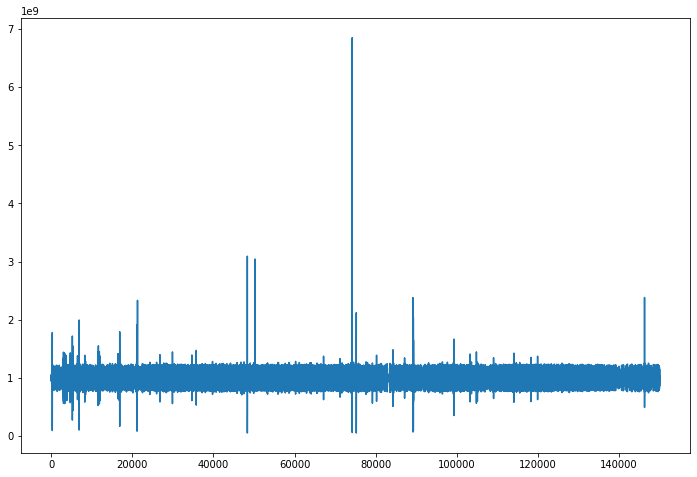

In [3]:
idx = full_dataset.index.values
ts_diffs = np.diff(idx)
ts_diffs

fig, ax= plt.subplots(1,1, figsize = (12,8))
ax.plot(ts_diffs)
plt.show()